In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
titanic = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


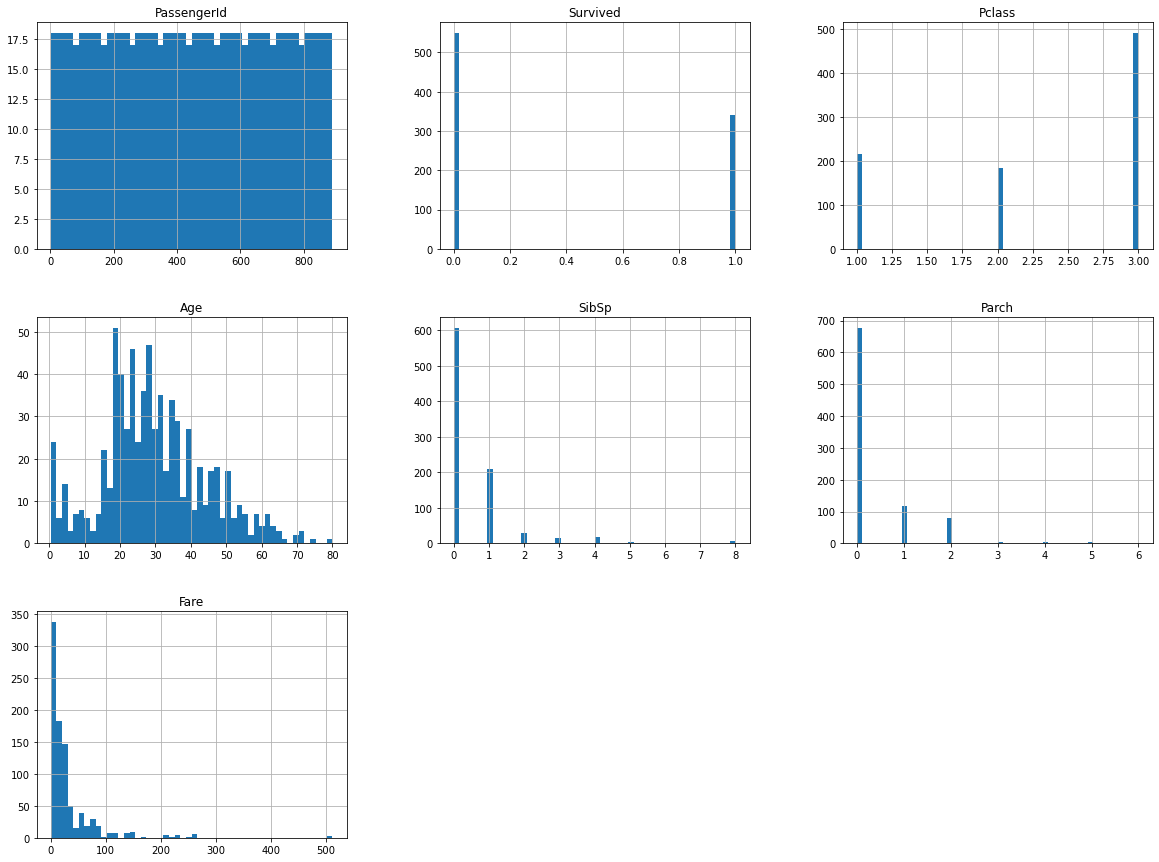

In [7]:
# %matplotlib inline
import matplotlib.pyplot as plt
titanic.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
titanic["Cabin"].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
D              3
F2             3
              ..
E63            1
C101           1
E58            1
D10 D12        1
C50            1
Name: Cabin, Length: 147, dtype: int64

In [10]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

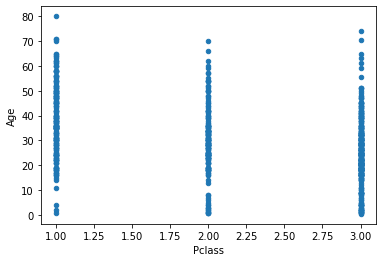

In [14]:
titanic.plot(kind="scatter", x="Pclass", y="Age")

In [15]:
corr_matrix = titanic.corr()

In [16]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [25]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

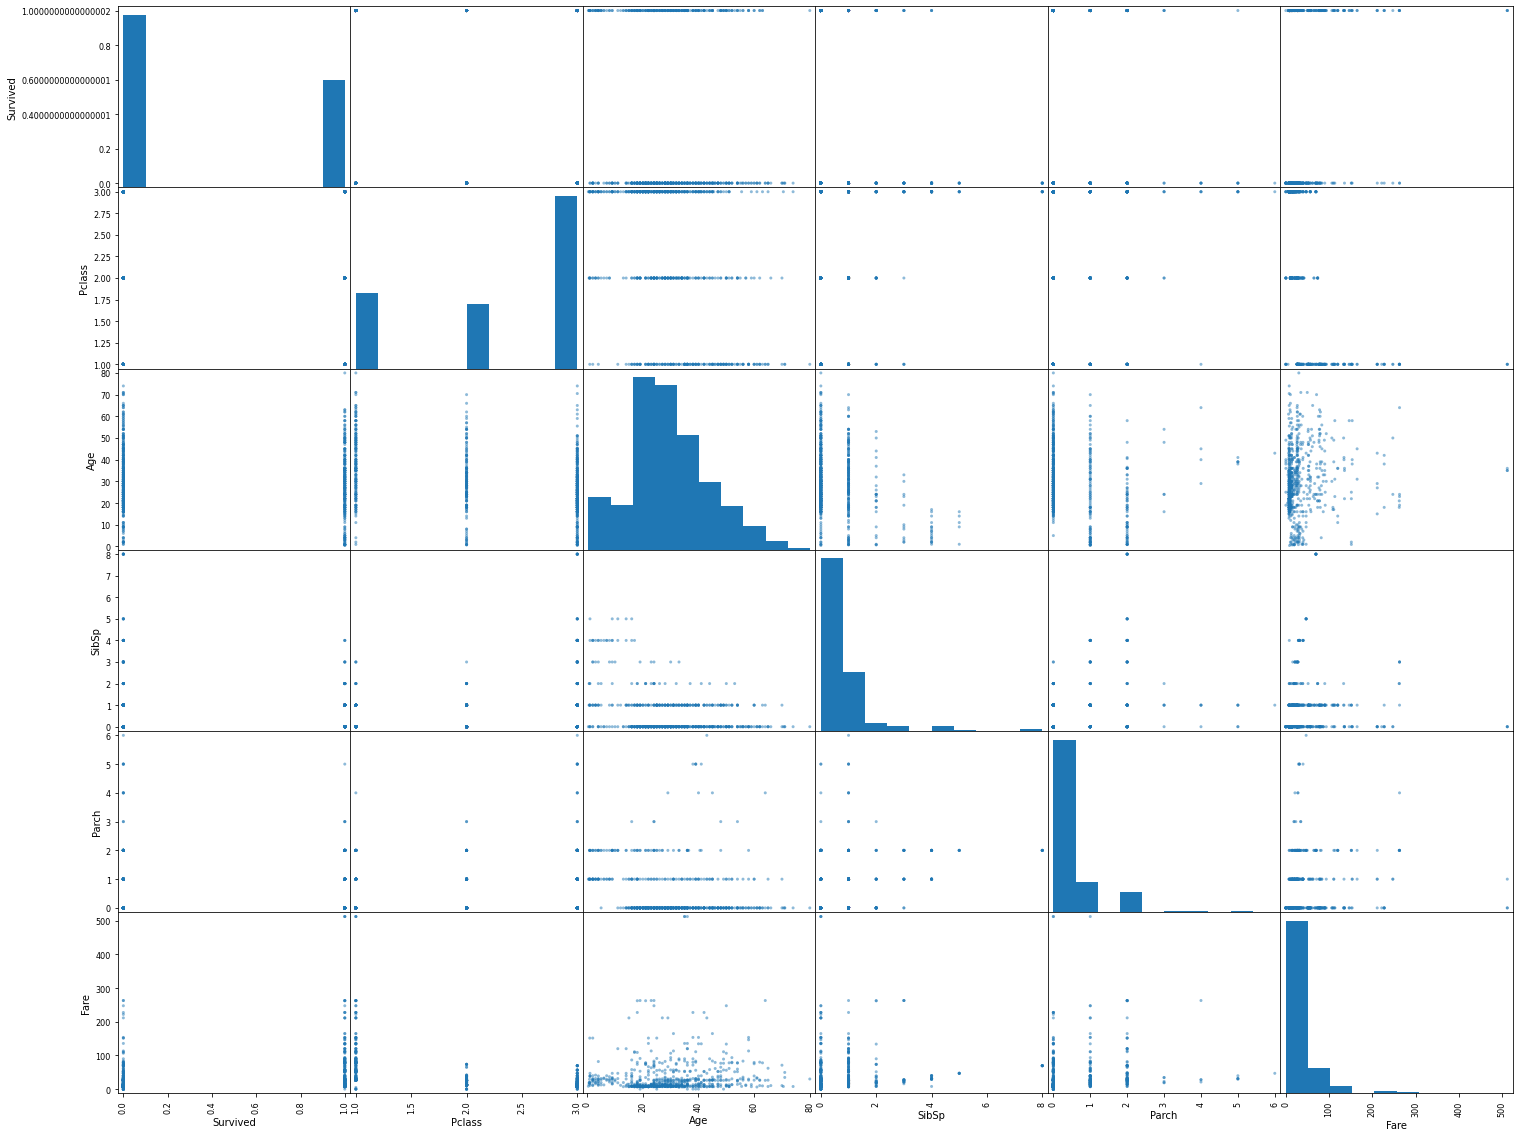

In [32]:
from pandas.plotting import scatter_matrix
attributes = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
scatter_matrix(titanic[attributes], figsize=(25,20))
plt.show()

In [38]:
X_train = titanic.drop('Survived', axis=1)
y_train = titanic['Survived'].copy()

In [39]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
X_train = X_train.drop('PassengerId', axis=1)
X_train = X_train.drop('Name', axis=1)
X_train = X_train.drop('Ticket', axis=1)



In [70]:
def remove_columns(dataframe):
    result = dataframe.drop('PassengerId', axis=1)
    result = result.drop('Name', axis=1)
    result = result.drop('Ticket', axis=1)
    return result

In [41]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [43]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [72]:
num_attributes = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_attributes = ['Sex', 'Cabin', 'Embarked']

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# todo: one_host_encoding for Sex
# todo: deal with missing values
# todo: scale features

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attributes)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attributes)),
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

full_pipeline = FeatureUnion(transformer_list=[('num_pipeline', num_pipeline), ('cat_pipeline', cat_pipeline)])


In [73]:
X_train_prepared = full_pipeline.fit_transform(X_train)

In [54]:
X_train_prepared

array([[ 0.82737724, -0.49779327,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.71504807,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.19458293, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.3461881 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.19458293, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.26023257, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [57]:
# selecting model for classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# trying SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
cross_val_score(sgd_clf, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.77104377, 0.73737374, 0.57912458])

In [58]:
# trying RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier()
cross_val_score(forest_clf, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.78451178, 0.83501684, 0.8013468 ])

In [59]:
# trying KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
cross_val_score(knn, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.79124579, 0.79461279, 0.8013468 ])

In [60]:
# SVM Classifier
from sklearn.svm import SVC
svc = SVC()
cross_val_score(svc, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.80808081, 0.82491582, 0.83501684])

In [61]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
cross_val_score(linear_svc, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.7979798 , 0.78787879, 0.78114478])

In [64]:
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(max_iter=1000)
cross_val_score(ANN, X_train_prepared, y_train, cv=3, scoring="accuracy")

array([0.78451178, 0.81481481, 0.81818182])

In [68]:
svc.fit(X_train_prepared, y_train)

SVC()

In [92]:
# reading test data
titanic_test = pd.read_csv('/kaggle/input/titanic/test.csv')

# removing undesirable columns
passenger_ids = titanic_test['PassengerId'].copy()
titanic_test = remove_columns(titanic_test)

# split it into X,y
# X_test = titanic_test.drop('Survived', axis=1)
# y_test = titanic_test['Survived'].copy()

# prepare test data
X_test = full_pipeline.transform(titanic_test)

# final predictions
y_test_pred = svc.predict(X_test)

my_submission = pd.DataFrame({"PassengerId": passenger_ids, "Survived": y_test_pred})
my_submission.to_csv('submission.csv', index=False)
